In [1]:
# 1.	Data Cleaning and Preparation:
import pandas as pd
df = pd.read_csv('D:\\Assignments questions\\EDA1\\Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
print('shape:',df.shape)
print(df.head())

shape: (2126, 14)
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [6]:
# Check missing values before handling
print("Missing values before:\n", df.isna().sum())

Missing values before:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [10]:
# Handle missing values
# Handle missing values
for col in df.columns:
    if df[col].isna().sum() > 0:   # if column has missing values
        if df[col].dtype in ['float64', 'int64']:
            # For numeric → fill with median
            df[col].fillna(df[col].median(), inplace=True)
        else:
            # For categorical → fill with mode
            df[col].fillna(df[col].mode()[0], inplace=True)
# Check missing values after handling
print("\nMissing values after:\n", df.isna().sum())


Missing values after:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [19]:
# 1. Check current data types
print("Before correction:\n", df.dtypes)

# 2. Convert numeric-looking columns (object → numeric)
for col in df.columns:
    if df[col].dtype == "object":   # stored as string
        df[col] = pd.to_numeric(df[col], errors="coerce")  # convert to numbers (NaN if invalid)
        

Before correction:
 LB           float64
AC           float64
FM           float64
UC           float64
DL           float64
DS           float64
DP           float64
ASTV         float64
MSTV         float64
ALTV         float64
MLTV         float64
Width        float64
Tendency    category
NSP         category
dtype: object


In [20]:
# 3. Convert categorical columns to category type if needed
if "NSP" in df.columns:
    df["NSP"] = df["NSP"].astype("category")

if "Tendency" in df.columns:
    df["Tendency"] = df["Tendency"].astype("category")

# 4. Check again after correction
print("\nAfter correction:\n", df.dtypes)


After correction:
 LB           float64
AC           float64
FM           float64
UC           float64
DL           float64
DS           float64
DP           float64
ASTV         float64
MSTV         float64
ALTV         float64
MLTV         float64
Width        float64
Tendency    category
NSP         category
dtype: object


In [29]:
# Detect & Treat Outliers (IQR method)
for col in df.select_dtypes(include='number').columns:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    # Winsorize (cap values at lower/upper)
    df[col] = df[col].clip(lower, upper)
    '''Use .clip(lower, upper) →replaces extreme outliers with boundary values.

Example: if a value = 500 but upper = 200 → it becomes 200.'''

print("✅ Outliers treated using IQR method")

✅ Outliers treated using IQR method


In [30]:
# 2.	Statistical Summary:
# Select only numeric columns
num_cols = df.select_dtypes(include='number')

# Summary statistics
summary = num_cols.describe().T   # count, mean, std, min, 25%, 50%, 75%, max

# Add Median and IQR
summary["median"] = num_cols.median()
summary["IQR"] = summary["75%"] - summary["25%"]

print(summary[["mean", "median", "std", "IQR"]])

             mean      median        std        IQR
LB     133.290331  133.000000   9.930268  14.000000
AC       0.003132    0.001634   0.003828   0.005606
FM       0.001568    0.000000   0.002485   0.002567
UC       0.004362    0.004484   0.003001   0.004685
DL       0.001770    0.000000   0.002668   0.003289
DS       0.000000    0.000000   0.000000   0.000000
DP       0.000000    0.000000   0.000000   0.000000
ASTV    46.981873   49.000000  17.612745  29.000000
MSTV     1.304644    1.200000   0.781091   1.000000
ALTV     6.691678    0.000000  10.378400  11.000000
MLTV     8.007471    7.400000   5.047078   6.200000
Width   70.287203   67.000000  39.571995  63.000000


In [25]:
'''Explanation:
The baseline fetal heart rate (LB) is centered around 133 bpm with some extreme outliers, which may indicate abnormal cases. Most features like
accelerations, contractions, and decelerations are near zero but have rare spikes, showing skewed distributions. The class label (NSP) is imbalanced,
with mostly normal cases.'''

'Explanation:\nThe baseline fetal heart rate (LB) is centered around 133 bpm with some extreme outliers, which may indicate abnormal cases. Most features like\naccelerations, contractions, and decelerations are near zero but have rare spikes, showing skewed distributions. The class label (NSP) is imbalanced,\nwith mostly normal cases.'

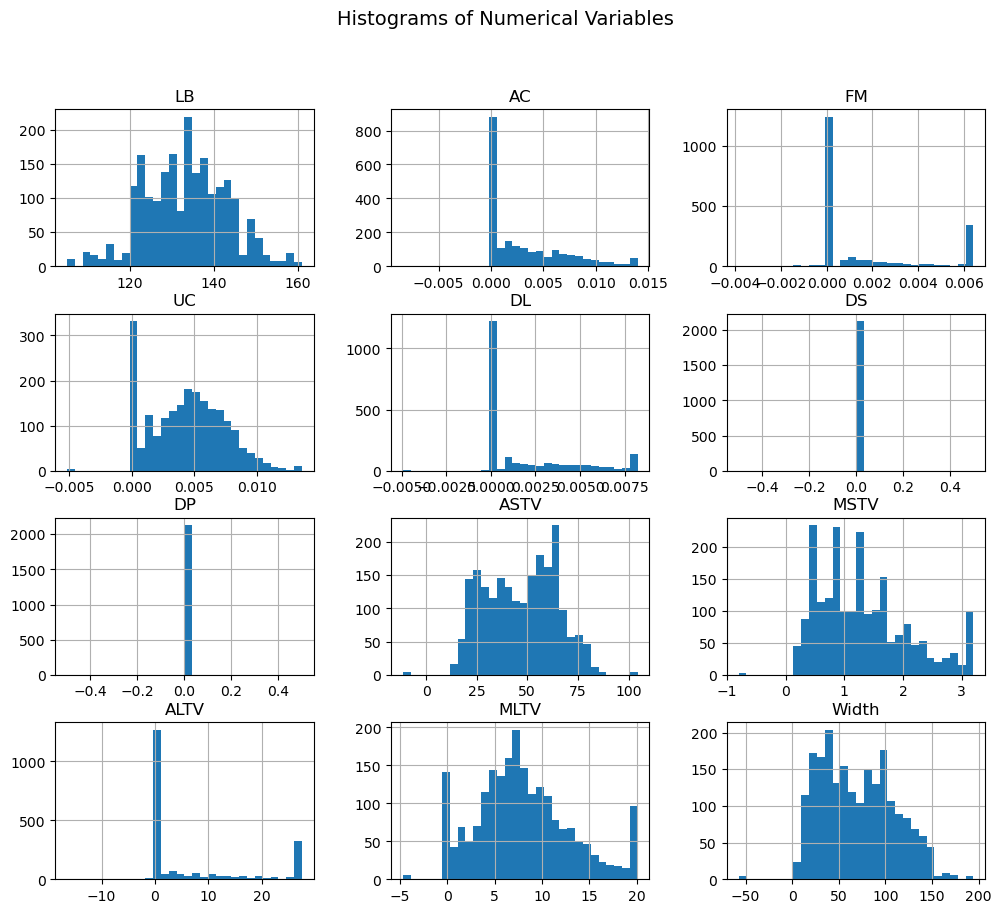

In [33]:
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include='number').columns

# Plot histograms
df[num_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Variables", fontsize=14)
plt.show()


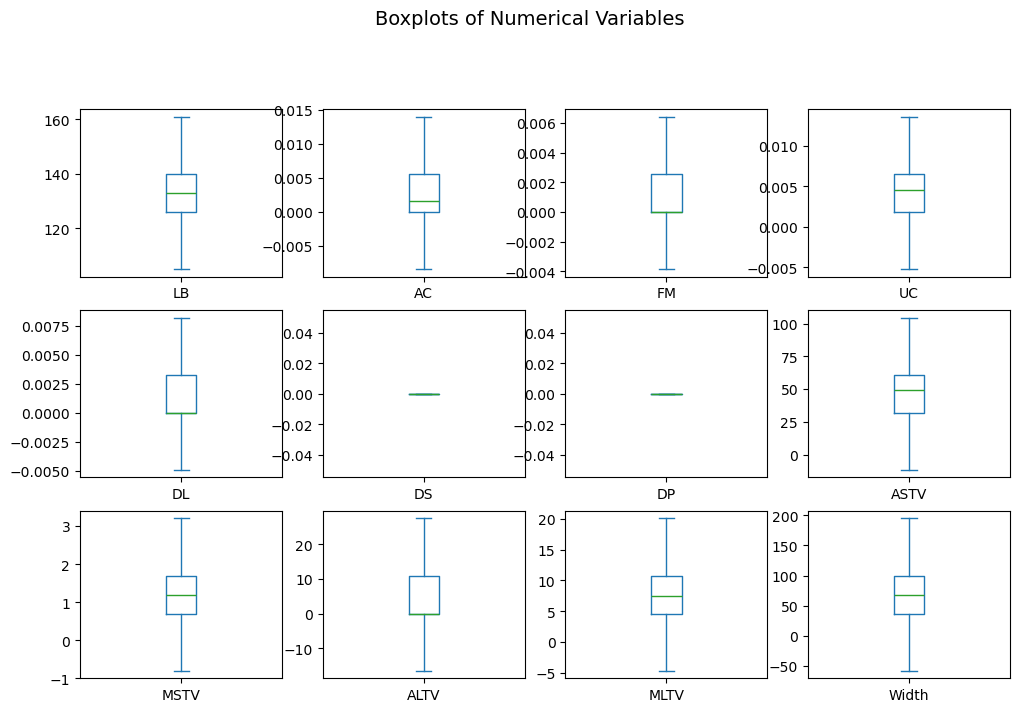

In [34]:
# Plot boxplots
df[num_cols].plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10), sharex=False, sharey=False)
plt.suptitle("Boxplots of Numerical Variables", fontsize=14)
plt.show()


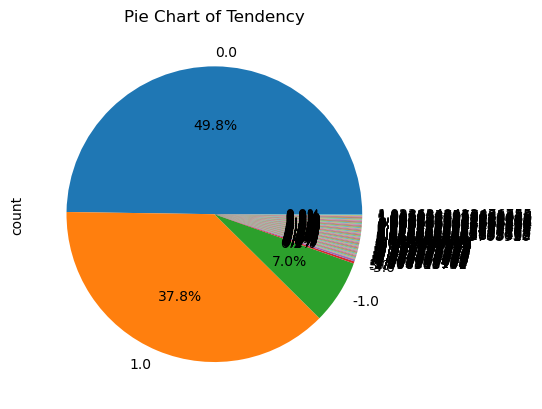

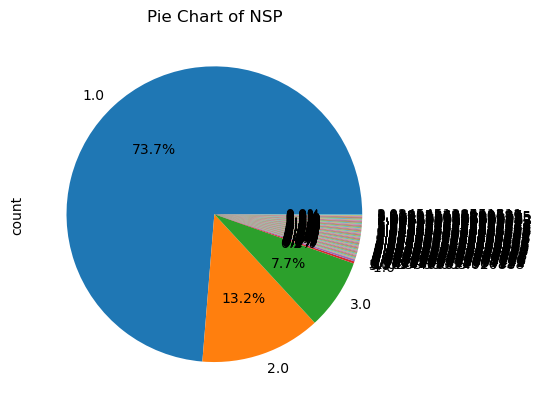

In [39]:
# Pie charts
for col in cat_cols:
    df[col].value_counts().plot(kind="pie", autopct="%1.1f%%", title=f"Pie Chart of {col}")
    plt.ylabel("")  # removes extra label
    plt.show()

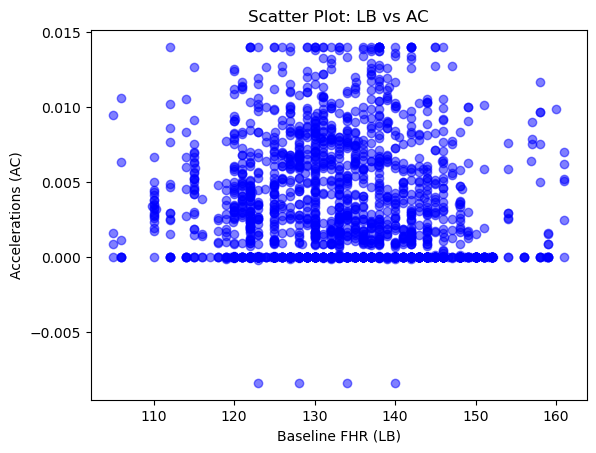

In [40]:
# Example scatter plot: Baseline FHR (LB) vs Accelerations (AC)
plt.scatter(df["LB"], df["AC"], alpha=0.5, color="blue")
plt.title("Scatter Plot: LB vs AC")
plt.xlabel("Baseline FHR (LB)")
plt.ylabel("Accelerations (AC)")
plt.show()

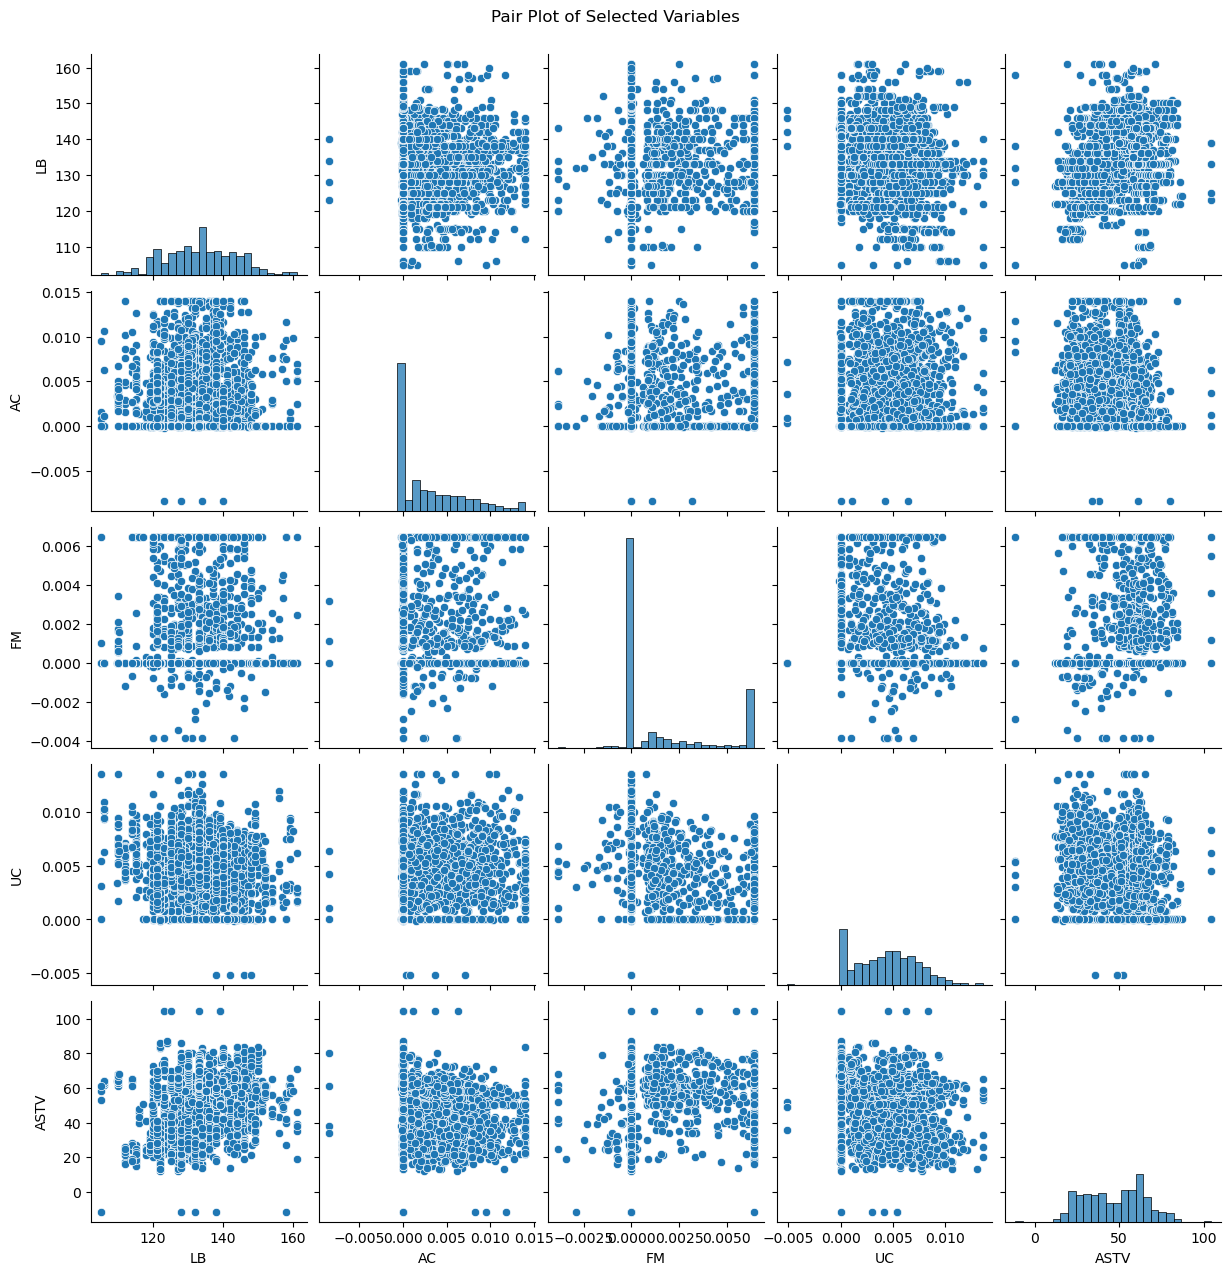

In [41]:
import seaborn as sns
# Pair plot for selected variables
sns.pairplot(df[["LB", "AC", "FM", "UC", "ASTV"]], diag_kind="hist")
plt.suptitle("Pair Plot of Selected Variables", y=1.02)
plt.show()

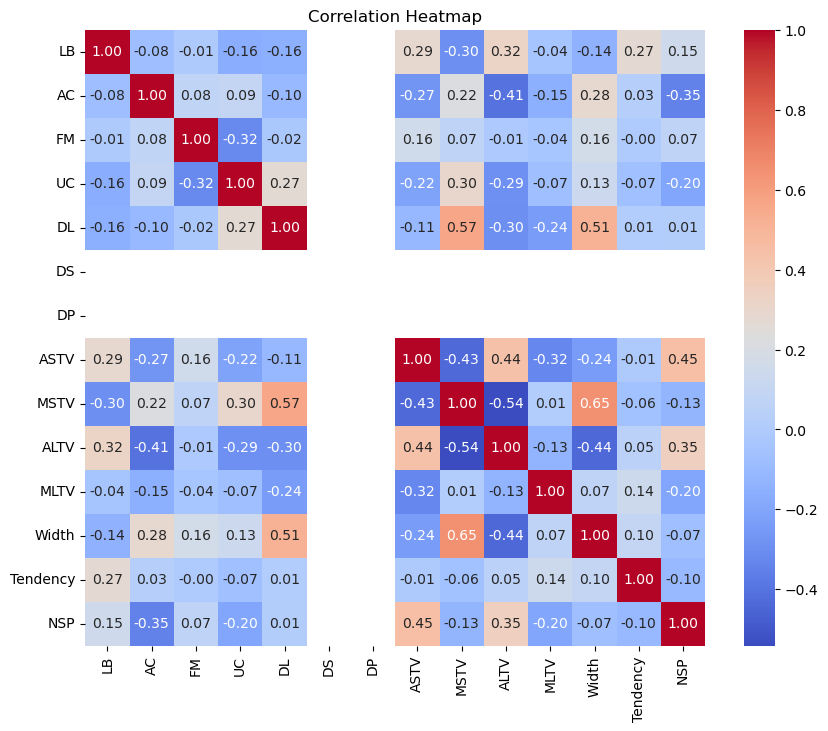

In [42]:
# Compute correlation matrix (numerical variables only)
corr = df.corr()

# Heatmap visualization
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [43]:
'''There is no explicit time column (like timestamp or sequence).
The data looks more like individual patient records rather than time series.
So → you cannot directly do time-trend analysis here.'''

'There is no explicit time column (like timestamp or sequence).\nThe data looks more like individual patient records rather than time series.\nSo → you cannot directly do time-trend analysis here.'

In [45]:
'''Summary:
The analysis showed that baseline fetal heart rate is mostly around 133 bpm with some extreme outliers. Accelerations, contractions, and decelerations
are usually near zero but occasionally spike. Variability measures are strongly correlated, and the class label (NSP) is imbalanced with mostly normal
cases.'''

'Summary:\nThe analysis showed that baseline fetal heart rate is mostly around 133 bpm with some extreme outliers. Accelerations, contractions, and decelerations\nare usually near zero but occasionally spike. Variability measures are strongly correlated, and the class label (NSP) is imbalanced with mostly normal\ncases.'

In [46]:
'''Impact:
These findings can help doctors identify abnormal fetal patterns early, guide clinical decisions, and improve monitoring. For further analysis,
addressing class imbalance will be important for building accurate predictive models.'''

'Impact:\nThese findings can help doctors identify abnormal fetal patterns early, guide clinical decisions, and improve monitoring. For further analysis,\naddressing class imbalance will be important for building accurate predictive models.'